In [18]:
import lsst.daf.persistence as dafPersist
import lsst.afw.image as afwImage
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/home/boutigny/LSST/CFHT/clusters/MACSJ2243.3-0935/output")
dataid = {'visit':1022181, 'filter':'r', 'ccd':35}
datasetType = 'src'

print butler.get("src" + "_filename", dataid)
print butler.get("calexp" + "_filename", dataid)
print butler.get("raw" + "_filename", dataid)

sources = butler.get('src', dataid)
exp = butler.get('calexp',dataid)

md = butler.get("calexp_md", dataid, immediate=True)
calib = afwImage.Calib(md)

schema = sources.getSchema()
print schema.getNames()

['/home/boutigny/LSST/CFHT/clusters/MACSJ2243.3-0935/output/src/08BO01/SCL-2241_P1/2008-09-03/r/SRC-1022181-35.fits']
['/home/boutigny/LSST/CFHT/clusters/MACSJ2243.3-0935/output/calexp/08BO01/SCL-2241_P1/2008-09-03/r/calexp-1022181-35.fits']
['/home/boutigny/LSST/CFHT/clusters/MACSJ2243.3-0935/output/_parent/raw/08BO01/SCL-2241_P1/2008-09-03/r/1022181p.fits.fz[36]']
('base_CircularApertureFlux_12_0_flag', 'base_CircularApertureFlux_12_0_flag_apertureTruncated', 'base_CircularApertureFlux_12_0_flux', 'base_CircularApertureFlux_12_0_fluxSigma', 'base_CircularApertureFlux_17_0_flag', 'base_CircularApertureFlux_17_0_flag_apertureTruncated', 'base_CircularApertureFlux_17_0_flux', 'base_CircularApertureFlux_17_0_fluxSigma', 'base_CircularApertureFlux_25_0_flag', 'base_CircularApertureFlux_25_0_flag_apertureTruncated', 'base_CircularApertureFlux_25_0_flux', 'base_CircularApertureFlux_25_0_fluxSigma', 'base_CircularApertureFlux_35_0_flag', 'base_CircularApertureFlux_35_0_flag_apertureTruncated

In [4]:
#print icSrcCat['flux.gaussian.psffactor']

#for src in icSrcCat :
#    print src.get('flux.gaussian.psffactor')

ds9.mtv(exp.getMaskedImage().getImage(), frame=2)
ds9.mtv(exp.getMaskedImage().getMask(), frame=3)
for src in sources:
    flux = src.get('base_SincFlux_flux')
    eflux = src.get('base_SincFlux_fluxSigma')
    if numpy.isfinite(src.getPsfFlux()):
        if flux >= 0. and flux/eflux > 5.0 :
            m, em = calib.getMagnitude(flux, eflux)
            if m < 17 :
                print src.get("base_PixelFlags_flag_saturated"), src.get("base_PixelFlags_flag_saturatedCenter")
                if src.get("base_PixelFlags_flag_saturated") :
                    continue
                centroid = src.getCentroid()
                print centroid
                with ds9.Buffering():
                    ds9.dot('+', centroid.getX(), centroid.getY(), frame=2)

ds9 doesn't appear to be running (XPA: XPA returned NULL, (;iconify no; raise)), I'll try to exec it for you


KeyError: "Field 'base_SincFlux_flux' not found in Schema."

In [3]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/home/boutigny/CFHT/test_cfht/output")

dataid = {'visit':996234, 'filter':'r', 'ccd':14}
exp = butler.get('calexp',dataid)

dataRef = {'visit':849375, 'filter':'r', 'ccd':14}
ref = butler.get('calexp',dataRef)

ds9.mtv(ref.getMaskedImage().getImage(), frame=2, wcs=ref.getWcs())
ds9.dot('o', 1076.75478218, 3228.84459111, frame=2, size=10)
ds9.mtv(exp.getMaskedImage().getImage(), frame=1, wcs=exp.getWcs())
ds9.dot('o', 1133.87422478, 4206.52248712, frame=1, size=10)


ds9 doesn't appear to be running (XPA: XPA returned NULL, (;iconify no; raise)), I'll exec it for you


In [30]:
schema = sources.getSchema()
print schema.getNames()

('base_ClassificationExtendedness_value', 'base_GaussianCentroid_flag', 'base_GaussianCentroid_flag_noPeak', 'base_GaussianCentroid_x', 'base_GaussianCentroid_y', 'base_GaussianFlux_flag', 'base_GaussianFlux_flux', 'base_GaussianFlux_fluxSigma', 'base_NaiveCentroid_flag', 'base_NaiveCentroid_flag_edge', 'base_NaiveCentroid_flag_noCounts', 'base_NaiveCentroid_x', 'base_NaiveCentroid_y', 'base_NaiveFlux_flag', 'base_NaiveFlux_flag_edge', 'base_NaiveFlux_flux', 'base_NaiveFlux_fluxSigma', 'base_PixelFlags_flag', 'base_PixelFlags_flag_bad', 'base_PixelFlags_flag_cr', 'base_PixelFlags_flag_crCenter', 'base_PixelFlags_flag_edge', 'base_PixelFlags_flag_interpolated', 'base_PixelFlags_flag_interpolatedCenter', 'base_PixelFlags_flag_saturated', 'base_PixelFlags_flag_saturatedCenter', 'base_PsfFlux_flag', 'base_PsfFlux_flag_edge', 'base_PsfFlux_flag_noGoodPixels', 'base_PsfFlux_flux', 'base_PsfFlux_fluxSigma', 'base_SdssCentroid_flag', 'base_SdssCentroid_flag_badData', 'base_SdssCentroid_flag_ed

In [22]:
print dir(exp)
print exp.getWcs()
#ds9.mtv(exp.getDecoratedImage())

['Factory', '__class__', '__del__', '__delattr__', '__dict__', '__doc__', '__float__', '__format__', '__getattr__', '__getattribute__', '__getitem__', '__hash__', '__init__', '__int__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__swig_destroy__', '__swig_getmethods__', '__swig_setmethods__', '__weakref__', '_s', 'census', 'clone', 'getBBox', 'getCalib', 'getDetector', 'getDimensions', 'getFilter', 'getHeight', 'getId', 'getInfo', 'getMaskedImage', 'getMetadata', 'getNextMemId', 'getPsf', 'getWcs', 'getWidth', 'getX0', 'getXY0', 'getY0', 'hasBeenCorrupted', 'hasPsf', 'hasWcs', 'init', 'magicSentinel', 'markPersistent', 'readFits', 'repr', 'setCalib', 'setCorruptionCallback', 'setDeleteCallback', 'setDeleteCallbackId', 'setDetector', 'setFilter', 'setMaskedImage', 'setMetadata', 'setNewCallback', 'setNewCallbackId', 'setPsf', 'setWcs', 'setXY0', 'swigConvert', 'this', 'writeFits']
<lsst.

In [2]:
import lsst.afw.table as afwTable

goodSources = afwTable.SourceCatalog(icSrcCat.table)
#print dir(goodSources.getSchema())
print goodSources.getSchema().getOrderedNames()

('id', 'coord', 'parent', 'calib_detected', 'calib_psfCandidate', 'calib_psfUsed', 'flags_negative', 'base_GaussianCentroid_x', 'base_GaussianCentroid_y', 'base_GaussianCentroid_flag', 'base_GaussianCentroid_flag_noPeak', 'base_NaiveCentroid_x', 'base_NaiveCentroid_y', 'base_NaiveCentroid_flag', 'base_NaiveCentroid_flag_noCounts', 'base_NaiveCentroid_flag_edge', 'base_PixelFlags_flag', 'base_PixelFlags_flag_edge', 'base_PixelFlags_flag_interpolated', 'base_PixelFlags_flag_interpolatedCenter', 'base_PixelFlags_flag_saturated', 'base_PixelFlags_flag_saturatedCenter', 'base_PixelFlags_flag_cr', 'base_PixelFlags_flag_crCenter', 'base_PixelFlags_flag_bad', 'base_SdssCentroid_x', 'base_SdssCentroid_y', 'base_SdssCentroid_xSigma', 'base_SdssCentroid_ySigma', 'base_SdssCentroid_x_y_Cov', 'base_SdssCentroid_flag', 'base_SdssCentroid_flag_edge', 'base_SdssCentroid_flag_badData', 'base_SdssShape_xx', 'base_SdssShape_yy', 'base_SdssShape_xy', 'base_SdssShape_xxSigma', 'base_SdssShape_yySigma', 'ba

In [13]:
badStarPixelFlags = ["base_PixelFlags_flag_cr", "base_PixelFlags_flag_interpolated"]
#badStarPixelFlags = []

badkeys = []
for name in badStarPixelFlags :
    try :
        key = goodSources.getSchema().find(name).key
    except Exception :
        print("Key '%s'; is not present in table schema " %(name))
        pass
    else :
        badkeys.append(key)
    
#badkeys = [goodSources.getSchema().find(name).key for name in badStarPixelFlags]
print badkeys

[Key['Flag'](offset=32, bit=15), Key['Flag'](offset=32, bit=11)]


In [1]:
import lsst.daf.persistence as dafPersist
from lsst.meas.astrom import Astrometry
import lsst.afw.cameraGeom as cg
import lsst.afw.geom as afwGeom
import math

# Image identification keys
visit = 849375
ccd = 25
filter = 'r'
ccdName = 'ccd'+str(ccd).zfill(2)

def angDist(ra_1, dec_1, ra_2, dec_2) :
# Compute separation angle between 2 positions in the sky given by their (ra,dec)
    sindec_1 = math.sin(dec_1)
    cosdec_1 = math.cos(dec_1)
    sindec_2 = math.sin(dec_2)
    cosdec_2 = math.cos(dec_2)
    cosra_2_ra_1 = math.cos(ra_2-ra_1)
    sinra_2_ra_1 = math.sin(ra_2-ra_1)
    
    aux = (cosdec_1 * sindec_2) - (sindec_1 * cosdec_2 * cosra_2_ra_1)
    num = (cosdec_2 * cosdec_2 * sinra_2_ra_1 * sinra_2_ra_1) + aux*aux
    den = (sindec_1 * sindec_2) + (cosdec_1 * cosdec_2 * cosra_2_ra_1)
    
    return math.atan2(math.sqrt(num), den)

#setup astrometry solver
solve = Astrometry.ConfigClass()
astrom = Astrometry(solve)

#setup butler
butler = dafPersist.Butler("/home/boutigny/CFHT/test_cfht/output")
dataid = {'visit':visit, 'filter':filter, 'ccd':ccd}

# setup camera
cam = butler.get('camera')
ccd = cam[ccdName]

# Retrieve calexp
calexp = butler.get('calexp', dataid)

# Find ccd center coordinates and use them to load the corresponding reference catalog
# from astrometry_net_data

detCenter = ccd.getCenter(cg.PIXELS).getPoint()
detCenterCoord = calexp.getWcs().pixelToSky(detCenter)
refCat = astrom.getReferenceSources(detCenterCoord.getLongitude(), detCenterCoord.getLatitude(), afwGeom.Angle(1., afwGeom.degrees), filter)

# Retrieve icSrc and icMatch catalogs
# ic stands for "image characterization"i.e. sources used to perform photometric and astrometric calibaration
# icMatch contains the match between icSrc sources and the reference catalog. Each row contains 3 numbers :
# distance, id in reference catalog, id of source in icSrc catalog
icSrc = butler.get('icSrc', dataid)
icMatch = butler.get('icMatch', dataid)

# Print out the icSrc table schema
#schema = icSrc.getSchema()
#print schema.getOrderedNames()
#print

# Sort icSrc and reference catalogs, this is mandatory in order to retrieve a row in a catalog based on its id
icSrc.sort()
refCat.sort()

diff_from_distance = []
diff_from_ra_dec = []
diff_between_both = []

print("Found %d matched sources in icMatch"%(len(icMatch)))
print

for match in icMatch:
# retrieve reference and source tables corresponding to the match
    ref = refCat.find(match.get('first'))
    source = icSrc.find(match.get('second'))
    if source != None : 
        dist = match.get('distance')
        
# Compute angular distance from source and reference cartesian coordinate
        dx = ref.getCoord().getVector().getX() - source.getCoord().getVector().getX()
        dy = ref.getCoord().getVector().getY() - source.getCoord().getVector().getY()
        dz = ref.getCoord().getVector().getZ() - source.getCoord().getVector().getZ()
        d2 = dx*dx + dy*dy + dz*dz
        ang2 = math.acos(1. - d2/2.)
        
# Compute angular distance from the source and reference (ra, dec) 
        ang = angDist(ref.getRa(), ref.getDec(), source.getRa(), source.getDec())
        print match.get('first'), match.get('second'), afwGeom.radToMas(dist), afwGeom.radToMas(ang), afwGeom.radToMas(ang2)
        
# Store results in list in order to check whether the angular distance computed 
# from the source and reference coordinates is matching the distance parameter recorded in icMatch
        diff_from_distance.append(afwGeom.radToMas(dist))
        diff_from_ra_dec.append(afwGeom.radToMas(ang))
        diff_between_both.append(afwGeom.radToMas(dist)-afwGeom.radToMas(ang))        
    else :
        print match.get('second'), "not found !"

Found 54 matched sources in icMatch

31806006600271 131329469867622404 14.7403964393 13.9438573506 14.0849364971
31806006700127 131329469867622405 15.9708168015 9.19664460154 9.22075537952
31806006700007 131329469867622410 18.9468511931 17.7706437694 17.6564023087
31806006600619 131329469867622414 81.2613127225 93.6606340982 93.6813418844
31806006700334 131329469867622417 45.0676046504 39.5421839265 39.6003742149
31806006700041 131329469867622420 31.0416881636 24.3407602678 24.3958256344
37121020500117 131329469867622425 29.6405815442 23.9599204076 24.0054672382
31806006600044 131329469867622429 20.6182358325 28.1123713888 28.1698729942
31806006600149 131329469867622427 52.3412686478 48.1888424997 48.207299036
31806006600113 131329469867622430 6.8727452775 5.328291678 5.3236056005
31806006700239 131329469867622431 56.7573925202 58.5867018885 58.5596616055
37121020500092 131329469867622441 14.7403964393 6.9706970668 6.8727452775
37121020500162 131329469867622447 53.7657810521 60.5841192

In [40]:
import lsst.afw.table as afwTable

match = afwTable.matchRaDec(refCat, icSrc, afwGeom.Angle(1./3600., afwGeom.degrees))

for indx, m in enumerate(match) :
    dx = m.first.getCoord().getVector().getX() - m.second.getCoord().getVector().getX()
    dy = m.first.getCoord().getVector().getY() - m.second.getCoord().getVector().getY()
    dz = m.first.getCoord().getVector().getZ() - m.second.getCoord().getVector().getZ()
    d2 = dx*dx + dy*dy + dz*dz
    ang2 = math.acos(1. - d2/2.)
    
    ang = angDist(m.first.getRa(), m.first.getDec(), m.second.getRa(), m.second.getDec())
    print indx, m.first.get('id'), m.second.get('id'), afwGeom.radToMas(m.distance), afwGeom.radToMas(ang), afwGeom.radToMas(ang2)


0 31806006700356 131329469867622401 219.282582407 219.283503745 219.282582407
1 31806006600271 131329469867622404 14.0849364971 13.9438573506 14.0849364971
2 31806006700127 131329469867622405 9.22075537952 9.19664460154 9.22075537952
3 31806006700007 131329469867622410 17.6564023087 17.7706437694 17.6564023087
4 31806006600619 131329469867622414 93.6813418844 93.6606340982 93.6813418844
5 31806006700334 131329469867622417 39.6003742149 39.5421839265 39.6003742149
6 31806006700041 131329469867622420 24.3958256344 24.3407602678 24.3958256344
7 37121020500117 131329469867622425 24.0054672382 23.9599204076 24.0054672382
8 31806006600044 131329469867622429 28.1698729942 28.1123713888 28.1698729942
9 31806006600149 131329469867622427 48.207299036 48.1888424997 48.207299036
10 31806006600113 131329469867622430 5.3236056005 5.328291678 5.3236056005
11 31806006700239 131329469867622431 58.5596616055 58.5867018885 58.5596616055
12 37121020500092 131329469867622441 6.8727452775 6.9706970668 6.872

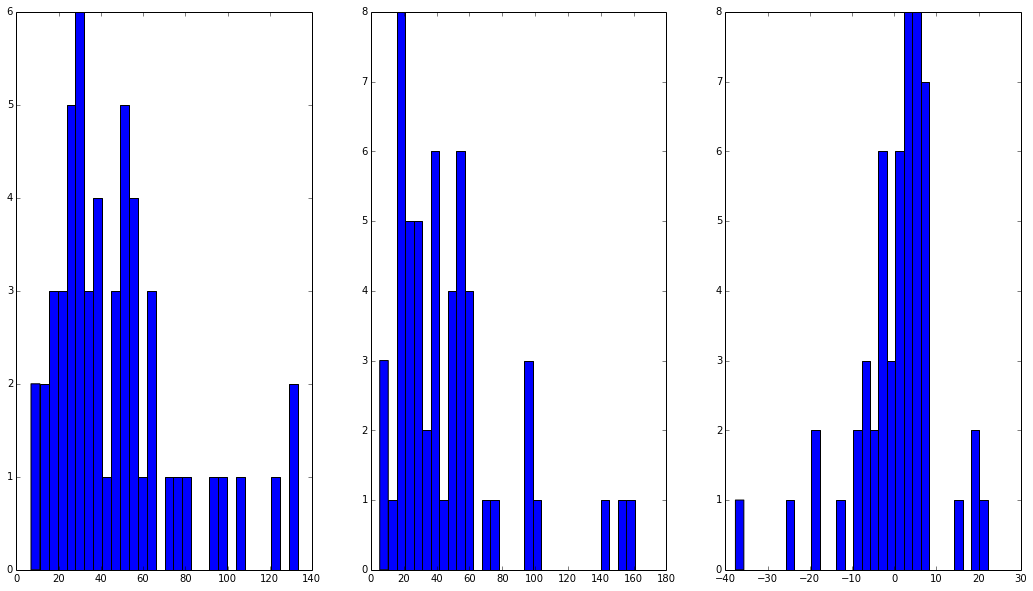

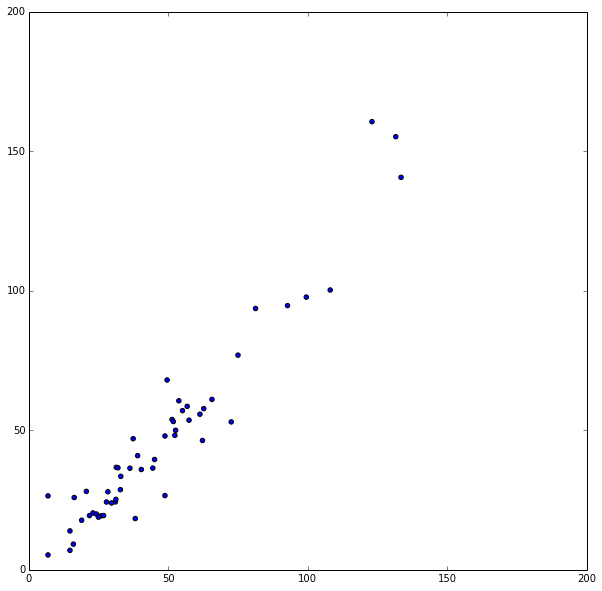

Number of sources kept 51 51
Astrometric scatter (median) from distance 39.6545571187 38.1421883431
Astrometric scatter (median) from ra, dec 36.6368086656 36.443481096


In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import numpy as np

# Plot distance between icSrc and reference sources
plt.clf()
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(18, 10))
ax0.hist(diff_from_distance,bins=30)
ax1.hist(diff_from_ra_dec,bins=30)
ax2.hist(diff_between_both,bins=30)
plt.show()

plt.clf()
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 10))
ax0.scatter(diff_from_distance,diff_from_ra_dec)
ax0.set_xlim([0.,200.])
ax0.set_ylim([0.,200.])
plt.show()

# Compute median value of the distance

# select distances < 110 miliarcsec
idxs = np.where(np.asarray(diff_from_distance) < 110)
idxs2 = np.where(np.asarray(diff_from_ra_dec) < 110)
print "Number of sources kept", len(idxs[0]), len(idxs2[0])
print "Astrometric scatter (median) from distance", np.median(diff_from_distance), np.median(np.asarray(diff_from_distance)[idxs])
print "Astrometric scatter (median) from ra, dec", np.median(diff_from_ra_dec), np.median(np.asarray(diff_from_ra_dec)[idxs2])

In [34]:
print dir(src)
print dir(calexp)

['ColumnView', 'Record', 'Table', '_SourceCatalogBase__getColumns', '__class__', '__del__', '__delattr__', '__delitem__', '__dict__', '__doc__', '__format__', '__getattr__', '__getattribute__', '__getitem__', '__hash__', '__init__', '__iter__', '__len__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__swig_destroy__', '__swig_getmethods__', '__swig_setmethods__', '__weakref__', '_columns', '_s', 'addNew', 'append', 'between', 'capacity', 'cast', 'columns', 'copy', 'equal_range', 'extend', 'find', 'get', 'getChildren', 'getColumnView', 'getSchema', 'getTable', 'insert', 'isContiguous', 'isSorted', 'lower_bound', 'readFits', 'reserve', 'schema', 'sort', 'subset', 'table', 'this', 'upper_bound', 'writeFits']
['Factory', '__class__', '__del__', '__delattr__', '__dict__', '__doc__', '__float__', '__format__', '__getattr__', '__getattribute__', '__getitem__', '__hash__', '__init__', '__int__', 

In [69]:
for s in icSrc :
    print s.getX(), s.getY(), s.get('base_SdssCentroid_x'), s.get('base_SdssCentroid_y')

1480.0 8.0 1480.0 8.0
1123.12150318 53.9310731309 1123.12150318 53.9310731309
1537.65486643 91.0633305501 1537.65486643 91.0633305501
383.65711652 39.9126424027 383.65711652 39.9126424027
856.590985956 109.509362316 856.590985956 109.509362316
1202.9972224 150.832601034 1202.9972224 150.832601034
532.956997411 169.475458655 532.956997411 169.475458655
65.0 149.0 65.0 149.0
540.105728894 207.774728603 540.105728894 207.774728603
1007.0 208.0 1007.0 208.0
1422.0 215.0 1422.0 215.0
1555.50353553 247.522805505 1555.50353553 247.522805505
2021.0 254.0 2021.0 254.0
471.917646019 263.574032218 471.917646019 263.574032218
668.002366899 286.954949341 668.002366899 286.954949341
1765.87355105 282.40459178 1765.87355105 282.40459178
1928.68474831 300.148996535 1928.68474831 300.148996535
1342.65914538 307.317333273 1342.65914538 307.317333273
1189.53234523 319.336071029 1189.53234523 319.336071029
25.6057311641 338.653470275 25.6057311641 338.653470275
1912.26755616 346.489182593 1912.26755616 34

In [73]:
for s in icSrc :
    ra, dec = s.getCoord()
    print ra - s.getRa(), dec - s. getDec()

0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 rad 0 rad
0 ra

In [22]:
import lsst.daf.persistence as dafPersist
from lsst.meas.astrom import Astrometry
import lsst.afw.cameraGeom as cg
import lsst.afw.geom as afwGeom
import math

# Image identification keys
visit = 995367
ccd = 0
filter = 'r'
ccdName = 'ccd'+str(ccd).zfill(2)

#setup butler
butler = dafPersist.Butler("/home/boutigny/CFHT/test_cfht/output")
dataid = {'visit':visit, 'filter':filter, 'ccd':ccd}

# Retrieve src
source = butler.get('src', dataid)

# Print out the src table schema
schema = source.getSchema()
names = schema.getOrderedNames()

sel = []
for n in names :
    if 'flags' in n :
#        print n
        sel.append(n)

for s in source[0:5] :
    print
    for idx, sl in enumerate(sel) :
        print idx, sl, s.get(sl)


0 flags.negative False
1 flags.badcentroid True
2 centroid.sdss.flags True
3 centroid.gaussian.flags False
4 centroid.naive.flags False
5 flags.pixel.edge True
6 flags.pixel.interpolated.any False
7 flags.pixel.interpolated.center False
8 flags.pixel.saturated.any False
9 flags.pixel.saturated.center False
10 flags.pixel.cr.any False
11 flags.pixel.cr.center False
12 flags.pixel.bad False
13 shape.sdss.flags False
14 shape.sdss.centroid.flags False
15 shape.sdss.flags.unweightedbad False
16 shape.sdss.flags.unweighted False
17 shape.sdss.flags.shift False
18 shape.sdss.flags.maxiter False
19 flux.gaussian.flags True
20 flux.gaussian.flags.psffactor False
21 flux.naive.flags True
22 flux.psf.flags True
23 flux.psf.flags.psffactor True
24 flux.sinc.flags False
25 correctfluxes.apcorr.flags True

0 flags.negative False
1 flags.badcentroid True
2 centroid.sdss.flags True
3 centroid.gaussian.flags False
4 centroid.naive.flags False
5 flags.pixel.edge True
6 flags.pixel.interpolated.any Fal

In [24]:
from astropy.io import fits

hdulist = fits.open("/home/boutigny/CFHT/test_cfht/output/src/08AL01/D3/2008-06-01/r/SRC-995367-00.fits")
hdulist.info()
tbdata = hdulist[1].data
flags = tbdata.field('flags')
for f in flags[0:5] :
    for idx, ff in enumerate(f) :
        print idx, ff


Filename: /home/boutigny/CFHT/test_cfht/output/src/08AL01/D3/2008-06-01/r/SRC-995367-00.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()           int16   
1                BinTableHDU    214   3085R x 28C   [29X, 1K, 2D, 1K, 2D, 3E, 2D, 3E, 2D, 3E, 3D, 6E, 2D, 3E, 1D, 1D, 1E, 1D, 1D, 1D, 1D, 1E, 1D, 1D, 1E, 1D, 1PJ(636), 1PE(84)]   
0 False
1 False
2 False
3 False
4 True
5 True
6 False
7 False
8 True
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 True
23 False
24 True
25 True
26 True
27 False
28 True
0 False
1 False
2 False
3 False
4 True
5 True
6 False
7 False
8 True
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 True
23 False
24 True
25 True
26 True
27 False
28 True
0 False
1 False
2 False
3 False
4 True
5 True
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False


In [25]:
from lsst.meas.astrom import Astrometry
import lsst.daf.persistence as dafPersist
import lsst.afw.cameraGeom as cg
import lsst.afw.geom as afwGeom
import lsst.afw.image as afwImage
import lsst.afw.table as afwTable
import math

visit = 918231
filter = "g"

# List of flags used to reject suspicious sources
Flags = ["base_PixelFlags_flag_saturated", "base_PixelFlags_flag_cr", "base_PixelFlags_flag_interpolated",
         "base_PsfFlux_flag_edge"]

#setup butler
butler = dafPersist.Butler("/home/boutigny/CFHT/test_cfht/output")

mag =[]
magE = []
flag = 0
for ccd in range(36) :
    print "CCD :", ccd
    dataid = {'visit':visit, 'filter':filter, 'ccd':ccd}
    src = butler.get('src', dataid, immediate=True)
    md = butler.get("calexp_md", dataid, immediate=True)
    calib = afwImage.Calib(md)
    for s in src :
        for f in Flags :
            rej = 0
            if s.get(f) :
                rej = 1
                break
            if rej == 1 :
                continue
        flux = s.get('base_SincFlux_flux')
        eflux = s.get('base_SincFlux_fluxSigma')
        
        if flux >= 0. and flux/eflux > 5.0 :
            m, em = calib.getMagnitude(flux, eflux)
            mag.append(m)
            magE.append(em)
            
            if flag == 0 and m < 18 and em > 0.1 :
                print ccd
                flag = 1

CCD : 0
CCD : 1
CCD : 2
CCD : 3
CCD : 4
CCD : 5
CCD : 6
CCD : 7
CCD : 8
CCD : 9
CCD : 10
CCD : 11
11
CCD : 12
CCD : 13
CCD : 14
CCD : 15
CCD : 16
CCD : 17
CCD : 18
CCD : 19
CCD : 20
CCD : 21
CCD : 22
CCD : 23
CCD : 24
CCD : 25
CCD : 26
CCD : 27
CCD : 28
CCD : 29
CCD : 30
CCD : 31
CCD : 32
CCD : 33
CCD : 34
CCD : 35


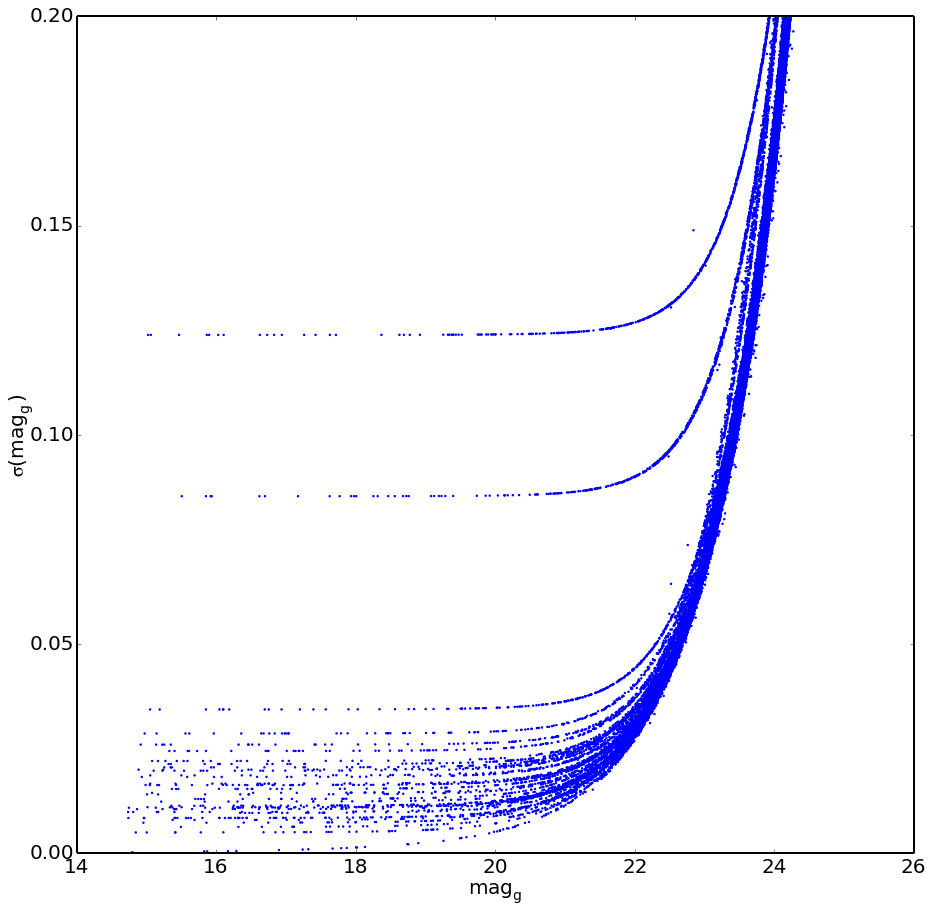

In [24]:
%matplotlib inline
import cPickle as pickle
import matplotlib
import matplotlib.pylab as plt
import numpy as np

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'bold',
        'size'   : 25,
        }

plt.rcParams['axes.linewidth'] = 2 
plt.rcParams['mathtext.default'] = 'regular'

fig, (ax) = plt.subplots(ncols=1, figsize=(15,15))
ax.scatter(mag, magE, s=2, color='b')
ax.set_xlabel("$mag_g$", fontsize=20, weight='normal')
ax.set_ylabel("$\sigma(mag_g)$", fontsize=20, weight='normal', labelpad=-5)
#ax.set_xlim([14,22])
ax.set_ylim([0,0.2])
ax.tick_params(labelsize=20)


In [9]:
print len(mag), len(magE)
print mag[:10], magE[:10]

74094 74094
[23.69913201428816, 17.576126810810322, 23.347009914447124, 23.721412970316777, 23.09211111388755, 22.493211873693213, 23.6912980516208, 24.170258280051907, 23.76665223061216, 22.282724595157756] [0.12267371097246071, 0.00637268972759675, 0.08859755496539524, 0.12429826566586434, 0.07115428002006975, 0.04120714481423758, 0.12086353302639101, 0.18696989804347658, 0.1311152628672948, 0.03473984240911893]


In [19]:
extKey = schema["base_ClassificationExtendedness_value"].asKey()
extFlagKey = schema["base_ClassificationExtendedness_flag"].asKey()
xxKey = schema["base_SdssShape_xx"].asKey()
yyKey = schema["base_SdssShape_yy"].asKey()
sdssFlagKey = schema["base_SdssShape_flag"].asKey()
fluxKey = schema["base_CircularApertureFlux_6_0_flux"].asKey()
fluxSigmaKey = schema["base_CircularApertureFlux_6_0_fluxSigma"].asKey()
fluxFlagKey = schema["base_CircularApertureFlux_6_0_flag"].asKey()

xx = []
yy = []
for s in sources :
    if s.get(extFlagKey) or s.get(sdssFlagKey) or s.get(fluxFlagKey) :
        continue
    if s.get(extKey) > 0.5 :
        continue
    
    flux = s.get(fluxKey)
    if flux <= 0. :
        continue
    fluxS = s.get(fluxSigmaKey)
    if flux/fluxS < 10. :
        continue
    mag = calib.getMagnitude(flux)
    
    if mag > 22 :
        continue
        
    xx.append(s.get(xxKey))
    yy.append(s.get(yyKey))

(2.4, 3)

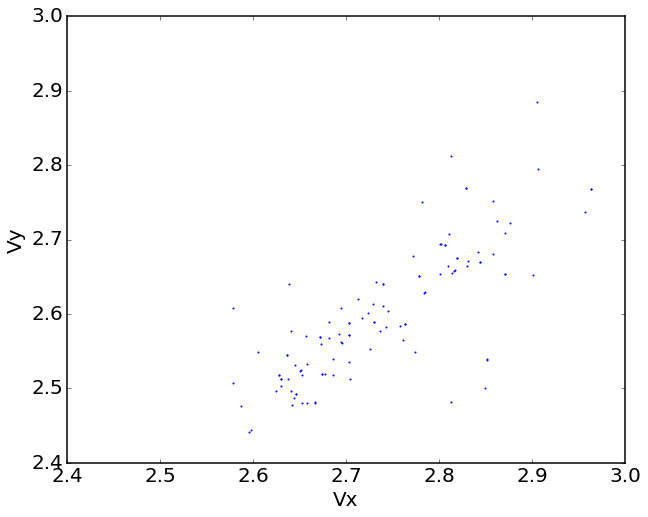

In [21]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import numpy as np

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'bold',
        'size'   : 25,
        }

plt.rcParams['axes.linewidth'] = 1.5 #set the value globally

fig, (ax0) = plt.subplots(ncols=1, figsize=(10, 8))
ax0.scatter(xx, yy, s=1, color="b")
#ax0.set_xlim([-5, 5])
#ax0.set_ylim([-5, 5])
ax0.set_xlabel("Vx", fontsize=20)
ax0.set_ylabel("Vy", fontsize=20)
ax0.tick_params(labelsize=20)
ax0.set_xlim([2.4,3])
ax0.set_ylim([2.4,3])
